## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from tqdm import tqdm_notebook

import plotly.graph_objs as go

import emoji

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import string

## Importing the data

In [2]:
data = pd.read_csv("Data/reddit-top-flairs.csv")

In [3]:
data.head()

,id,url,title,body,flair
0,g2ct57,https://www.reddit.com/r/india/comments/g2ct57...,A polite request to all Indians here,I don't know if it is the same situation in ot...,Politics
1,futac9,https://www.reddit.com/r/india/comments/futac9...,Pitting a community against a political party ...,First of all let me start by saying it was stu...,Politics
2,ff8sth,https://i.redd.it/yjo9wpy38el41.jpg,A new political party gave a full front page a...,NaN,Politics
3,fpaj1w,https://theprint.in/india/hit-by-backlash-over...,Hit by backlash over posts on lack of medical ...,NaN,Politics
4,fxs1vy,https://www.timesnownews.com/india/article/pol...,Politics in the time of corona: WB CM question...,NaN,Politics


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      989 non-null    object
 1   url     989 non-null    object
 2   title   989 non-null    object
 3   body    554 non-null    object
 4   flair   989 non-null    object
dtypes: object(5)
memory usage: 38.8+ KB


### Handling all the missing data ;)

In [5]:
data["body"].fillna("NIL", inplace = True)

In [6]:
data.head()

,id,url,title,body,flair
0,g2ct57,https://www.reddit.com/r/india/comments/g2ct57...,A polite request to all Indians here,I don't know if it is the same situation in ot...,Politics
1,futac9,https://www.reddit.com/r/india/comments/futac9...,Pitting a community against a political party ...,First of all let me start by saying it was stu...,Politics
2,ff8sth,https://i.redd.it/yjo9wpy38el41.jpg,A new political party gave a full front page a...,NIL,Politics
3,fpaj1w,https://theprint.in/india/hit-by-backlash-over...,Hit by backlash over posts on lack of medical ...,NIL,Politics
4,fxs1vy,https://www.timesnownews.com/india/article/pol...,Politics in the time of corona: WB CM question...,NIL,Politics


### Data Cleaning

**We are going to clean the DF mainly for:**

* StopWords
* Punctuation and Improper Spaces
* HTML tags
* URL/ Link in tile/ body
* Emoji

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/keshav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keshav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def remove_stopwords(text):
        if text is not None:
            tokens = [x for x in word_tokenize(text) if x not in stop]
            return " ".join(tokens)
        else:
            return None

In [9]:
def remove_punct(text):
    exclude = set(string.punctuation)
    s = ''.join(ch for ch in text if ch not in exclude)
    return s

In [10]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [11]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [12]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [13]:
def clean_df(df, train=True):
    data["dirty_title"] = data['title']
    data["dirty_body"] = data['body']
    
    data["title"] = data['title'].apply(lambda x : x.lower())
    data["title"] = data['title'].apply(lambda x: remove_emoji(x))
    data["title"] = data['title'].apply(lambda x : remove_URL(x))
    data["title"] = data['title'].apply(lambda x : remove_html(x))
    data["title"] = data['title'].apply(lambda x : remove_stopwords(x))     
    data["title"] = data['title'].apply(lambda x : remove_punct(x))    
    data.title = data.title.replace('\s+', ' ', regex=True)
    
    data["body"] = data['body'].apply(lambda x : x.lower())
    data["body"] = data['body'].apply(lambda x: remove_emoji(x))
    data["body"] = data['body'].apply(lambda x : remove_URL(x))
    data["body"] = data['body'].apply(lambda x : remove_html(x))
    data["body"] = data['body'].apply(lambda x : remove_stopwords(x))     
    data["body"] = data['body'].apply(lambda x : remove_punct(x))    
    data.body = data.body.replace('\s+', ' ', regex=True)
    
    
    
    return data

In [14]:
data = clean_df(data)
data.head()

,id,url,title,body,flair,dirty_title,dirty_body
0,g2ct57,https://www.reddit.com/r/india/comments/g2ct57...,polite request indians,nt know situation countries india seen lot org...,Politics,A polite request to all Indians here,I don't know if it is the same situation in ot...
1,futac9,https://www.reddit.com/r/india/comments/futac9...,pitting community political party fucking stupid,first let start saying stupid whatever muslims...,Politics,Pitting a community against a political party ...,First of all let me start by saying it was stu...
2,ff8sth,https://i.redd.it/yjo9wpy38el41.jpg,new political party gave full front page ad po...,nil,Politics,A new political party gave a full front page a...,NIL
3,fpaj1w,https://theprint.in/india/hit-by-backlash-over...,hit backlash posts lack medical gear doctors g...,nil,Politics,Hit by backlash over posts on lack of medical ...,NIL
4,fxs1vy,https://www.timesnownews.com/india/article/pol...,politics time corona wb cm questions centre s ...,nil,Politics,Politics in the time of corona: WB CM question...,NIL


### EDA

In [15]:
categories = np.array(data['flair'].unique())
x = np.array(data['flair'])
print(categories)
print(x)

['Politics' 'Non-Political' 'Coronavirus' 'AskIndia' 'Policy/Economy'
 '[R]eddiquette' 'Photography' 'Business/Finance' 'Sports'
 'Science/Technology']
['Politics' 'Politics' 'Politics' 'Politics' 'Politics' 'Politics'
 'Politics' 'Politics' 'Politics' 'Politics' 'Politics' 'Politics'
 'Politics' 'Politics' 'Politics' 'Politics' 'Politics' 'Politics'
 'Politics' 'Politics' 'Politics' 'Politics' 'Politics' 'Politics'
 'Politics' 'Politics' 'Politics' 'Politics' 'Politics' 'Politics'
 'Politics' 'Politics' 'Politics' 'Politics' 'Politics' 'Politics'
 'Politics' 'Politics' 'Politics' 'Politics' 'Politics' 'Politics'
 'Politics' 'Politics' 'Politics' 'Politics' 'Politics' 'Politics'
 'Politics' 'Politics' 'Politics' 'Politics' 'Politics' 'Politics'
 'Politics' 'Politics' 'Politics' 'Politics' 'Politics' 'Politics'
 'Politics' 'Politics' 'Politics' 'Politics' 'Politics' 'Politics'
 'Politics' 'Politics' 'Politics' 'Politics' 'Politics' 'Politics'
 'Politics' 'Politics' 'Politics' 'Politics'

In [16]:
ds = pd.Series({"Column" : x})

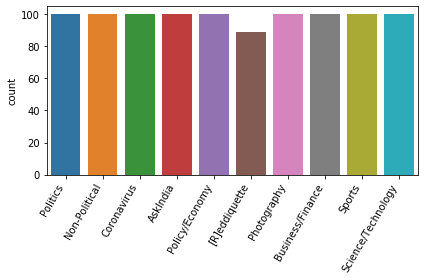

In [30]:
plot = sns.countplot(x="Column", data=ds)

plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

### Analysis on number of total words, unique words and characters.

In [19]:
data["num_words_title"] = data["title"].apply(lambda x: len(str(x).split()))
data["num_words_body"] = data["body"].apply(lambda x: len(str(x).split()))

In [20]:
data["num_unique_words_title"] = data["title"].apply(lambda x: len(set(str(x).split())))
data["num_unique_words_body"] = data["body"].apply(lambda x: len(set(str(x).split())))

In [21]:
data["num_chars_title"] = data["title"].apply(lambda x: len(str(x)))
data["num_chars_body"] = data["body"].apply(lambda x: len(str(x)))

In [22]:
data.head()

,id,url,title,body,flair,dirty_title,dirty_body,num_words_title,num_words_body,num_unique_words_title,num_unique_words_body,num_chars_title,num_chars_body
0,g2ct57,https://www.reddit.com/r/india/comments/g2ct57...,polite request indians,nt know situation countries india seen lot org...,Politics,A polite request to all Indians here,I don't know if it is the same situation in ot...,3,109,3,83,22,757
1,futac9,https://www.reddit.com/r/india/comments/futac9...,pitting community political party fucking stupid,first let start saying stupid whatever muslims...,Politics,Pitting a community against a political party ...,First of all let me start by saying it was stu...,6,157,6,119,49,1067
2,ff8sth,https://i.redd.it/yjo9wpy38el41.jpg,new political party gave full front page ad po...,nil,Politics,A new political party gave a full front page a...,NIL,12,1,12,1,73,3
3,fpaj1w,https://theprint.in/india/hit-by-backlash-over...,hit backlash posts lack medical gear doctors g...,nil,Politics,Hit by backlash over posts on lack of medical ...,NIL,26,1,23,1,191,3
4,fxs1vy,https://www.timesnownews.com/india/article/pol...,politics time corona wb cm questions centre s ...,nil,Politics,Politics in the time of corona: WB CM question...,NIL,15,1,15,1,84,3


In [61]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['num_words_title'],name = 'Num of words in Title'))
fig.add_trace(go.Histogram(x=data['num_unique_words_title'],name = 'Num of unique words in Title'))
fig.add_trace(go.Histogram(x=data['num_chars_title'],name = 'Num of Char in Title'))
fig.update_layout(barmode='stack')
fig.update_traces(opacity=0.75)
fig.show()

In [24]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['num_words_body'],name = 'Num of words in Body'))
fig.add_trace(go.Histogram(x=data['num_unique_words_body'],name = 'Num of unique words in Body'))
fig.add_trace(go.Histogram(x=data['num_chars_body'],name = 'Num of Char in Body'))
fig.update_layout(barmode='stack')
fig.update_traces(opacity=0.75)
fig.show()

#### Inference:
1. We can infer from the first diagram that, almost all flairs have equal distribution of data, and there isnt any skewness.
2. An analysis on the number of words, unique words, and the number of charecters is done.
3. From the DataFrame it is clear that "topic" and "body" are the features that are going help predict the flair for a reddit post, so those 2 will be our inpu features and the output feature obviously will be the "flair" feature